In [1]:
import pandas as pd

df=pd.read_csv('../data/mxmh_survey_results.csv')
print(df.describe())
print('--------------------------------------------------------------')
print(df.dtypes)
print('-------------------------------------------------------------------')
categorical_columns = df.select_dtypes(include=['object'])
print(categorical_columns)
print('----------------------------------------------------------------------------')
numeric_columns = df.select_dtypes(include=['float64'])
print(numeric_columns)
print('----------------------------------------------------------------------------')
print('There is missing values?')
df.isna().sum()
print('----------------------------------------------------------------------------')
print('The labels are unbalecnted')
df['Music effects'].value_counts()


              Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000  
---------------------------------------------

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

In [4]:
df['Primary streaming service'].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service', nan], dtype=object)

In [35]:
# Train_Test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


df = df.dropna(subset=['Music effects'])
X=df.drop(['Timestamp','Music effects','Permissions','Fav genre'],axis=1)
y=df['Music effects']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


X_train,X_test,y_train,y_test=train_test_split(X_resampled, y_resampled,test_size=0.8, random_state=42)



In [37]:
# Preprocess Featuares Models
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

categorical_columns = X_train.select_dtypes(include=['object']).columns.to_list()
numerical_columns = X_train.select_dtypes(include=['float64']).columns.to_list()



num_pipeline= Pipeline(
                steps=[
                    ('imputer',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler(with_mean=False))
                ]
            )

cat_pipeline=Pipeline(
                steps=[
                    ('imputer',SimpleImputer(strategy='most_frequent')),
                    ('one_hot_enconder',OneHotEncoder()),
                    ('scaler',StandardScaler(with_mean=False))
                ]
            )

preprocessor=ColumnTransformer(
                [
                    ('num_pipeline',num_pipeline,numerical_columns),
                    ('cat_pipeline',cat_pipeline,categorical_columns)
                ]
            )

preprocessor.fit(X_train)
X_to_fit=preprocessor.transform(X_train)
X_to_fit

array([[1.29506966e+00, 6.24654224e-01, 3.08750039e-06, ...,
        2.21978794e+00, 0.00000000e+00, 0.00000000e+00],
       [1.46774561e+00, 1.24930845e+00, 2.43750031e-06, ...,
        2.21978794e+00, 0.00000000e+00, 0.00000000e+00],
       [1.46774561e+00, 9.36981336e-01, 2.16666694e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.53985706e+00, 9.36981336e-01, 2.04027803e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20873168e+00, 9.36981336e-01, 1.37222239e-06, ...,
        0.00000000e+00, 2.42012238e+00, 0.00000000e+00],
       [1.72675954e+00, 3.12327112e-01, 2.22986139e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.45845545e+00]])

In [38]:
# Preprocess labels of model
from sklearn.preprocessing import LabelEncoder

y_labels=LabelEncoder().fit(y_train)
print(y_labels.classes_)

y_to_fit = y_labels.transform(y_train)
y_to_fit

['Improve' 'No effect' 'Worsen']


array([1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2,
       0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2,
       1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2,

Random Forest
Random Forest Model Train Accuracy: 1.00
Random Forest Model Test Accuracy Score: 0.77


d:\Romario\Programar\Ferramentas\Python\mlops\music_mental_health\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Romario\Programar\Ferramentas\Python\mlops\music_mental_health\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


              precision    recall  f1-score   support

           0       0.78      0.47      0.59       454
           1       0.61      0.86      0.72       429
           2       0.99      1.00      0.99       418

    accuracy                           0.77      1301
   macro avg       0.79      0.78      0.77      1301
weighted avg       0.79      0.77      0.76      1301

Decision Tree
Decision Tree Model Train Accuracy: 1.00
Decision Tree Model Test Accuracy Score: 0.72
              precision    recall  f1-score   support

           0       0.66      0.48      0.56       454
           1       0.61      0.69      0.65       429
           2       0.87      1.00      0.93       418

    accuracy                           0.72      1301
   macro avg       0.71      0.73      0.71      1301
weighted avg       0.71      0.72      0.71      1301

Gradient Boosting
Gradient Boosting Model Train Accuracy: 1.00
Gradient Boosting Model Test Accuracy Score: 0.75
              precision 

d:\Romario\Programar\Ferramentas\Python\mlops\music_mental_health\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Romario\Programar\Ferramentas\Python\mlops\music_mental_health\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Romario\Programar\Ferramentas\Python\mlops\music_mental_health\.venv\Lib\site-packages\sklear

XGBClassifier Model Test Accuracy Score: 0.76
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       454
           1       0.64      0.75      0.69       429
           2       0.92      1.00      0.96       418

    accuracy                           0.76      1301
   macro avg       0.76      0.77      0.76      1301
weighted avg       0.76      0.76      0.76      1301

CatBoosting Classifier
Learning rate set to 0.074719
0:	learn: 1.0694452	total: 4.36ms	remaining: 4.35s
1:	learn: 1.0479789	total: 7.43ms	remaining: 3.71s
2:	learn: 1.0218466	total: 9.63ms	remaining: 3.2s
3:	learn: 1.0014976	total: 11.9ms	remaining: 2.95s
4:	learn: 0.9731644	total: 14.1ms	remaining: 2.8s
5:	learn: 0.9492145	total: 16.3ms	remaining: 2.69s
6:	learn: 0.9244662	total: 20.8ms	remaining: 2.94s
7:	learn: 0.9036397	total: 23.1ms	remaining: 2.87s
8:	learn: 0.8835665	total: 25.3ms	remaining: 2.78s
9:	learn: 0.8631871	total: 27.4ms	remaining: 2.71s
10:	learn: 0

d:\Romario\Programar\Ferramentas\Python\mlops\music_mental_health\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Romario\Programar\Ferramentas\Python\mlops\music_mental_health\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


AdaBoost Classifier Model Train Accuracy: 0.73
AdaBoost Classifier Model Test Accuracy Score: 0.61
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       454
           1       0.54      0.66      0.59       429
           2       0.82      0.77      0.79       418

    accuracy                           0.61      1301
   macro avg       0.62      0.62      0.62      1301
weighted avg       0.62      0.61      0.61      1301



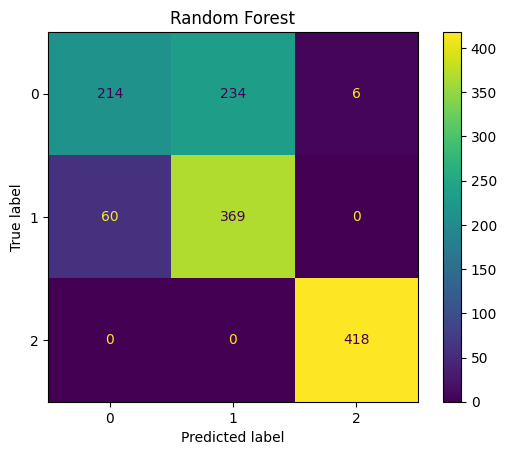

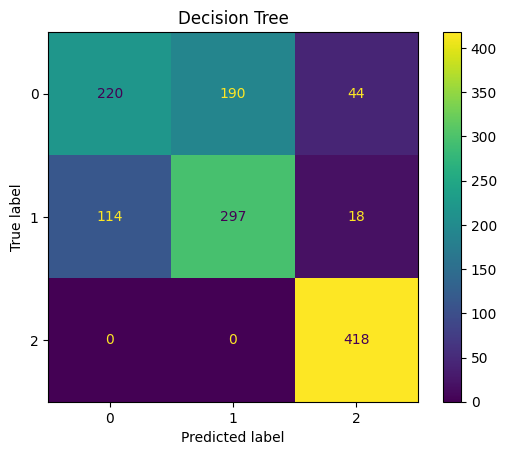

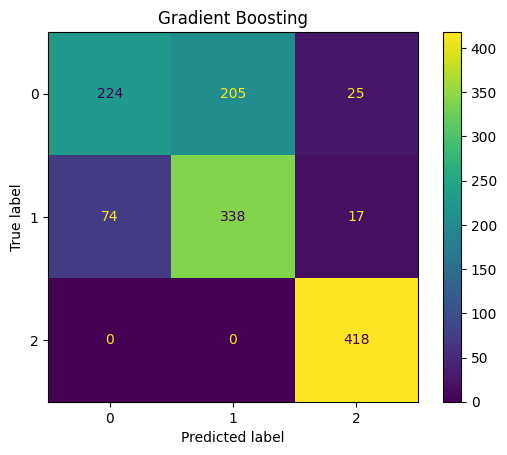

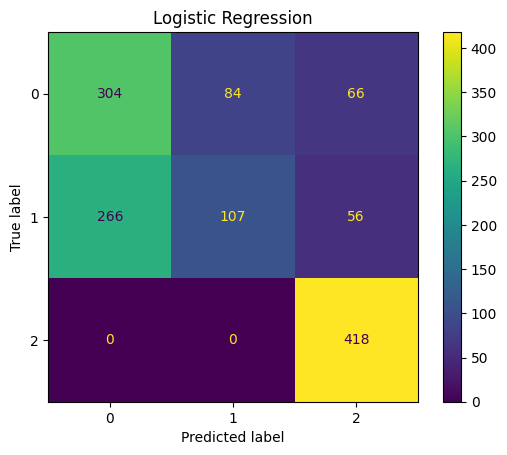

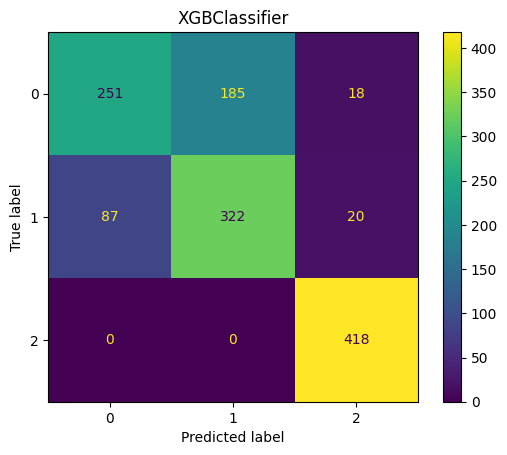

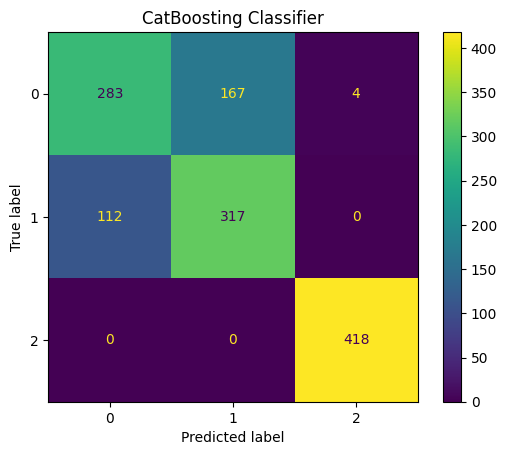

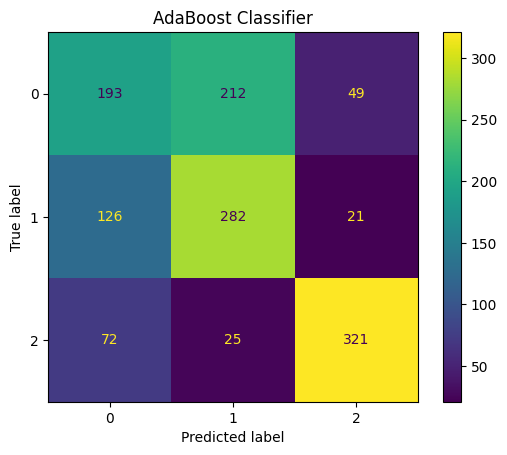

In [41]:
#Train Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import(
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay,accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
class_weights = {0: 0.7, 1: 0.1,2:0.2}
models = {
                "Random Forest": RandomForestClassifier(class_weight=class_weights),
                "Decision Tree": DecisionTreeClassifier(class_weight=class_weights),
                "Gradient Boosting": GradientBoostingClassifier(),
                "Logistic Regression": LogisticRegression(class_weight=class_weights),
                "XGBClassifier": XGBClassifier(),
                "CatBoosting Classifier": CatBoostClassifier(),
                "AdaBoost Classifier": AdaBoostClassifier()
            }


for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    print(model_name)
    
    model.fit(X_to_fit,y_to_fit)
    
    train_acc=model.score(X_to_fit,y_to_fit)
    print(f'{model_name} Model Train Accuracy: {train_acc:.2f}')

    
    x_to_test=preprocessor.transform(X_test)
    preds = model.predict(x_to_test)

    y_to_test=y_labels.transform(y_test.values.reshape(-1, 1))    
    acc_score=accuracy_score(y_to_test,preds)

    print(f'{model_name} Model Test Accuracy Score: {acc_score:.2f}')

    print(classification_report(y_to_test,preds))

    cm=confusion_matrix(y_to_test,preds,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    
    plt.title(f'{model_name}')    
    

In [43]:
import pickle
model= RandomForestClassifier(class_weight=class_weights).fit(X_to_fit,y_to_fit)
pickle.dump(model, open('../model.pkl', 'wb') )
pickle.dump(preprocessor, open('../preprocessor.pkl', 'wb') )